In [2]:
#importing libraries & modules

%load_ext tensorboard
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import datetime

#loading the dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/'
datafile = url + 'UCI%20HAR%20Dataset.zip'
!curl $datafile --output UCI_HAR_Dataset.zip
!unzip -qq UCI_HAR_Dataset.zip
!mv -f UCIn HARn Dataset UCI_HAR_DATASET

#creating the training & test sets

ytest = np.loadtxt('/content/UCI HAR Dataset/test/y_test.txt')-1
ytrain = np.loadtxt('/content/UCI HAR Dataset/train/y_train.txt')-1

xx=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt')
yy=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt')
zz=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt')

xtest = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None]),axis=2)

xx=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt')
yy=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt')
zz=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt')

xtrain = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None]),axis=2)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58.1M  100 58.1M    0     0  60.6M      0 --:--:-- --:--:-- --:--:-- 60.6M
mv: target 'UCI_HAR_DATASET' is not a directory


In [3]:
#checking the shape of the sets/arrays

xtrain.shape

(7352, 128, 3)

In [4]:
#checking the shape of the sets/arrays

print(ytrain.shape, ytest.shape)

(7352,) (2947,)


In [5]:
#checking the shape of the sets/arrays

xtest.shape

(2947, 128, 3)

In [6]:
#checking for NAs

np.isnan(np.sum(xtrain))

False

In [7]:
#checking for NAs

np.isnan(np.sum(xtest))

False

In [8]:
#checking for NAs

np.isnan(np.sum(ytest))

False

In [9]:
#checking for NAs

np.isnan(np.sum(ytrain))

False

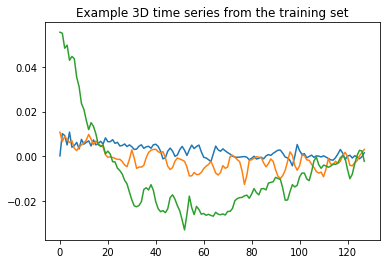

In [10]:
#plotting a time series as an example

plt.title('Example 3D time series from the training set')
plt.plot(xtrain[0]);

In [11]:
#encoding the labels

ytrain = ytrain.astype(int)
ytest = ytest.astype(int)


In [12]:
#printing the target variable

ytrain

array([4, 4, 4, ..., 1, 1, 1])

In [13]:
#part1 - model_1 - building the structure 

model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 3)), 
    keras.layers.Dense(384, activation='relu'),
    keras.layers.Dense(6, activation='softmax') 
])

#part1 - model_1 - compiling the model

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#part1 - model_1 - initialising the tensorboard log

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                      histogram_freq=1)

#part1 - model_1 - fitting the model

model_1.fit(xtrain, ytrain, epochs=100, validation_data=(xtest, ytest), 
            callbacks=[tensorboard_callback])

Epoch 1/100
230/230 [==============================] - 4s 5ms/step - loss: 1.1254 - accuracy: 0.5097 - val_loss: 0.8572 - val_accuracy: 0.5887
Epoch 2/100
230/230 [==============================] - 1s 3ms/step - loss: 0.7563 - accuracy: 0.6240 - val_loss: 0.7830 - val_accuracy: 0.5986
Epoch 3/100
230/230 [==============================] - 1s 3ms/step - loss: 0.6722 - accuracy: 0.6878 - val_loss: 0.7448 - val_accuracy: 0.6525
Epoch 4/100
230/230 [==============================] - 1s 3ms/step - loss: 0.6168 - accuracy: 0.7242 - val_loss: 0.7161 - val_accuracy: 0.7160
Epoch 5/100
230/230 [==============================] - 1s 3ms/step - loss: 0.5724 - accuracy: 0.7556 - val_loss: 0.6945 - val_accuracy: 0.7011
Epoch 6/100
230/230 [==============================] - 1s 3ms/step - loss: 0.5326 - accuracy: 0.7752 - val_loss: 0.6769 - val_accuracy: 0.7245
Epoch 7/100
230/230 [==============================] - 1s 3ms/step - loss: 0.4997 - accuracy: 0.7913 - val_loss: 0.6660 - val_accuracy: 0.7421

In [14]:
#part1 - model_1 - printing the summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 384)               147840    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 2310      
Total params: 150,150
Trainable params: 150,150
Non-trainable params: 0
_________________________________________________________________


In [15]:
#part1 - model_1 - opening tensorboard app

%tensorboard --logdir logs/fit

In [16]:
#part2 - model_2 - fitting a CNN

model_2 = keras.Sequential([
  keras.layers.Conv1D(filters=32, kernel_size=4, activation='relu', 
                      input_shape=(128,3)),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(6, activation='softmax') 
])

#part2 - model_2 - compiling the model

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#part2 - model_2 - fitting the model

history_2 = model_2.fit(xtrain, ytrain, epochs=100, 
                        validation_data=(xtest, ytest))

Epoch 1/100
230/230 [==============================] - 30s 5ms/step - loss: 0.9887 - accuracy: 0.5666 - val_loss: 1.2981 - val_accuracy: 0.5640
Epoch 2/100
230/230 [==============================] - 1s 4ms/step - loss: 0.7179 - accuracy: 0.6749 - val_loss: 0.8072 - val_accuracy: 0.6335
Epoch 3/100
230/230 [==============================] - 1s 5ms/step - loss: 0.6410 - accuracy: 0.6914 - val_loss: 0.6747 - val_accuracy: 0.6318
Epoch 4/100
230/230 [==============================] - 1s 4ms/step - loss: 0.6017 - accuracy: 0.7205 - val_loss: 0.6135 - val_accuracy: 0.7676
Epoch 5/100
230/230 [==============================] - 1s 4ms/step - loss: 0.5698 - accuracy: 0.7408 - val_loss: 0.6127 - val_accuracy: 0.7041
Epoch 6/100
230/230 [==============================] - 1s 5ms/step - loss: 0.5451 - accuracy: 0.7524 - val_loss: 0.5724 - val_accuracy: 0.8042
Epoch 7/100
230/230 [==============================] - 1s 5ms/step - loss: 0.5213 - accuracy: 0.7720 - val_loss: 0.5535 - val_accuracy: 0.725

In [17]:
#part2 - model_2 - printing the summary

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 125, 32)           416       
_________________________________________________________________
batch_normalization (BatchNo (None, 125, 32)           128       
_________________________________________________________________
dense_2 (Dense)              (None, 125, 100)          3300      
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 606       
Total params: 4,450
Trainable params: 4,386
Non-trainable params: 64
_________________________________________________________________


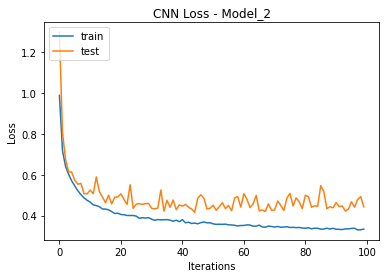

In [18]:
#part2 - model_2 - plotting the loss

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('CNN Loss - Model_2')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left');

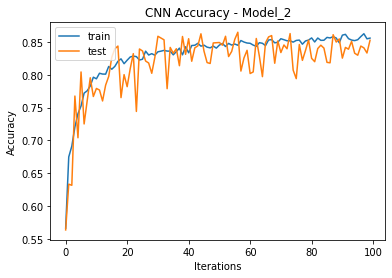

In [19]:
#part2 - model_2 - plotting the accuracy

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('CNN Accuracy - Model_2')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left');

In [20]:
#part2 - model_3 - enhancing the CNN

model_3 = keras.Sequential([
  keras.layers.Conv1D(filters=96, kernel_size=2, activation='relu', 
                      input_shape=(128,3)),
  keras.layers.Conv1D(filters=96, kernel_size=2, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(6, activation='softmax') 
])

#part2 - model_3 - compiling the model

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#part2 - model_3 - fitting the model

history_3 = model_3.fit(xtrain, ytrain, epochs=100, 
                        validation_data=(xtest, ytest))

Epoch 1/100
230/230 [==============================] - 3s 7ms/step - loss: 0.8704 - accuracy: 0.5820 - val_loss: 1.2643 - val_accuracy: 0.6373
Epoch 2/100
230/230 [==============================] - 1s 5ms/step - loss: 0.6439 - accuracy: 0.6863 - val_loss: 0.7888 - val_accuracy: 0.6196
Epoch 3/100
230/230 [==============================] - 1s 5ms/step - loss: 0.5621 - accuracy: 0.7212 - val_loss: 0.5891 - val_accuracy: 0.7574
Epoch 4/100
230/230 [==============================] - 1s 5ms/step - loss: 0.5168 - accuracy: 0.7508 - val_loss: 0.4721 - val_accuracy: 0.8110
Epoch 5/100
230/230 [==============================] - 1s 5ms/step - loss: 0.4588 - accuracy: 0.7920 - val_loss: 0.4990 - val_accuracy: 0.7733
Epoch 6/100
230/230 [==============================] - 1s 5ms/step - loss: 0.4207 - accuracy: 0.8104 - val_loss: 0.4634 - val_accuracy: 0.7764
Epoch 7/100
230/230 [==============================] - 1s 5ms/step - loss: 0.3966 - accuracy: 0.8259 - val_loss: 0.4438 - val_accuracy: 0.8062

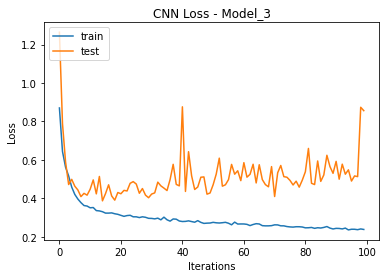

In [21]:
#part2 - model_3 - plotting the loss

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('CNN Loss - Model_3')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left');

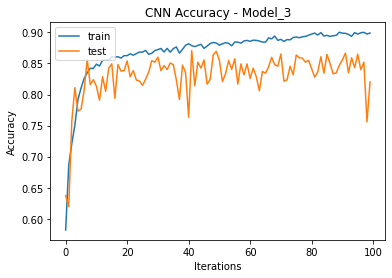

In [22]:
#part2 - model_3 - plotting the accuracy

plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('CNN Accuracy - Model_3')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left');

In [23]:
#part2 - model_3 - printing the summary

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 127, 96)           672       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 126, 96)           18528     
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 96)           384       
_________________________________________________________________
dense_4 (Dense)              (None, 126, 100)          9700      
_________________________________________________________________
dropout (Dropout)            (None, 126, 100)          0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

In [24]:
#part3 - model_4 - creating the training set

xx=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt')
yy=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt')
zz=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt')
xxt=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt')
yyt=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt')
zzt=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt')
xxg=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt')
yyg=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt')
zzg=np.loadtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt')

x_train = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None],
xxt[:,:,None],yyt[:,:,None],zzt[:,:,None],
xxg[:,:,None],yyg[:,:,None],zzg[:,:,None]),axis=2)


#part3 - model_4 - creating the test set

xx=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt')
yy=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt')
zz=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt')
xxt=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt')
yyt=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt')
zzt=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt')
xxg=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt')
yyg=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt')
zzg=np.loadtxt('/content/UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt')

x_test = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None],
xxt[:,:,None],yyt[:,:,None],zzt[:,:,None],
xxg[:,:,None],yyg[:,:,None],zzg[:,:,None]),axis=2)

#part3 - model_4 - checking the shapes

print(x_train.shape, x_test.shape)

(7352, 128, 9) (2947, 128, 9)


In [25]:
#checking for NAs

np.isnan(np.sum(x_train))

False

In [26]:
#checking for NAs

np.isnan(np.sum(x_test))

False

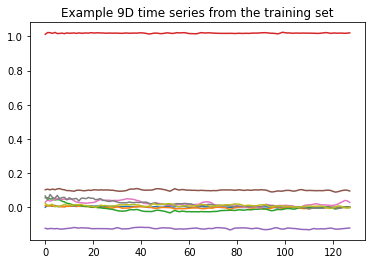

In [27]:
#part3 - model_4 - plotting one example

plt.title('Example 9D time series from the training set')
plt.plot(x_train[0]);

In [28]:
#part3 - model_4 - fitting the cnn to the full datatset

model_4 = keras.Sequential([
  keras.layers.Conv1D(filters=96, kernel_size=2, activation='relu', 
                      input_shape=(128,9)),
  keras.layers.Conv1D(filters=96, kernel_size=2, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(6, activation='softmax') 
])

#part3 - model_4 - compiling the model

model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#part3 - model_4 - fitting the model

history_4 = model_4.fit(x_train, ytrain, epochs=100, 
                        validation_data=(x_test, ytest))

Epoch 1/100
230/230 [==============================] - 2s 6ms/step - loss: 0.3639 - accuracy: 0.8896 - val_loss: 0.7887 - val_accuracy: 0.8758
Epoch 2/100
230/230 [==============================] - 1s 5ms/step - loss: 0.1492 - accuracy: 0.9455 - val_loss: 0.3536 - val_accuracy: 0.8958
Epoch 3/100
230/230 [==============================] - 1s 5ms/step - loss: 0.1280 - accuracy: 0.9479 - val_loss: 0.3863 - val_accuracy: 0.8768
Epoch 4/100
230/230 [==============================] - 1s 5ms/step - loss: 0.1145 - accuracy: 0.9510 - val_loss: 0.4059 - val_accuracy: 0.8931
Epoch 5/100
230/230 [==============================] - 1s 5ms/step - loss: 0.1126 - accuracy: 0.9518 - val_loss: 0.3513 - val_accuracy: 0.9315
Epoch 6/100
230/230 [==============================] - 1s 5ms/step - loss: 0.1005 - accuracy: 0.9551 - val_loss: 0.4075 - val_accuracy: 0.8962
Epoch 7/100
230/230 [==============================] - 1s 5ms/step - loss: 0.0977 - accuracy: 0.9553 - val_loss: 0.3222 - val_accuracy: 0.9325

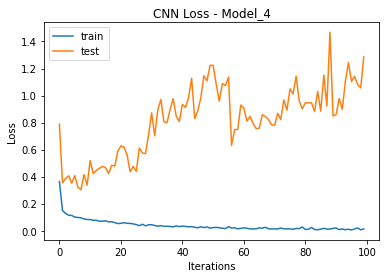

In [30]:
#part3 - model_4 - plotting the loss

plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('CNN Loss - Model_4')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left');

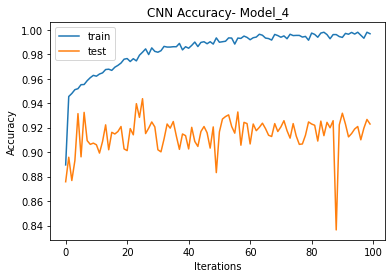

In [31]:
#part3 - model_4 - plotting the accuracy

plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('CNN Accuracy- Model_4')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left');